<font size="12">Exploring the datasets</font>

# Setting up

## Importing libraries

In [1]:
import pandas as pd
import pathlib
import keras
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
import sys


## Importing data

In [2]:
url_normal = '../data/CT/Lung/normal/'
url_airspace = '../data/CT/Lung/Airspace_opacity/'
url_bronch = '../data/CT/Lung/Bronchiectasis/'
url_inter = '../data/CT/Lung/interstitial_lung_disease/'
url_nodule = '../data/CT/Lung/Nodule/'
url_parenchyma = '../data/CT/Lung/Parenchyma_destruction/'


In [19]:
url_normal


'../data/CT/Lung/normal/'

In [3]:
sys.path.append('..')
from louis_directory.auto_trainer import AutoTrainer


In [4]:


train = AutoTrainer(url_normal, url_bronch, limit=200)
train.plot_loss_accuracy()
train.evaluate_accuracy()


Epoch 1/100
2/3 [===================>..........] - ETA: 1s - loss: 64.0094 - binary_accuracy: 0.5234 - recall: 0.5294   

KeyboardInterrupt: 

In [21]:
train = AutoTrainer(url_normal, url_inter, limit=200)
train.plot_loss_accuracy()
train.evaluate_accuracy()


Epoch 1/100
2/3 [===================>..........] - ETA: 1s - loss: 76.1589 - binary_accuracy: 0.4688 - recall: 0.4608   

KeyboardInterrupt: 

In [5]:
from louis_directory.auto_vgg16 import AutoVgg16

train = AutoVgg16(url_normal, url_parenchyma, limit=200)
train.plot_loss_accuracy()
train.evaluate_accuracy()


Epoch 1/100
3/3 [==============================] - 85s 28s/step - loss: 160.7174 - binary_accuracy: 0.5392 - recall: 0.3468 - val_loss: 45.4666 - val_binary_accuracy: 0.5476 - val_recall: 0.0000e+00
Epoch 2/100


KeyboardInterrupt: 

In [ ]:
images_airspace = [cv2.imread(file) for file in glob.glob(url_airspace+"*.png")][:limite]
images_bronch = [cv2.imread(file) for file in glob.glob(url_bronch+"*.png")][:limite]
images_inter = [cv2.imread(file) for file in glob.glob(url_inter+"*.png")][:limite]
images_nodule = [cv2.imread(file) for file in glob.glob(url_nodule+"*.png")][:limite]
images_parenchyma = [cv2.imread(file) for file in glob.glob(url_parenchyma+"*.png")][:limite]

len(images_airspace), len(images_bronch), len(images_inter), len(images_nodule), len(images_parenchyma)


(288, 288, 288, 288, 288)

## Parenchyma model

In [ ]:
#images_nodule = [cv2.imread(file) for file in glob.glob(url_nodule + "*.png")]
labels_parenchyma = [1] * len(images_parenchyma)

#images_normal = [cv2.imread(file) for file in glob.glob(url_normal + "*.png")]
labels_normal = [0] * len(images_normal)


## Checking data

In [ ]:
normal_count = len(images_normal)
normal_count


320

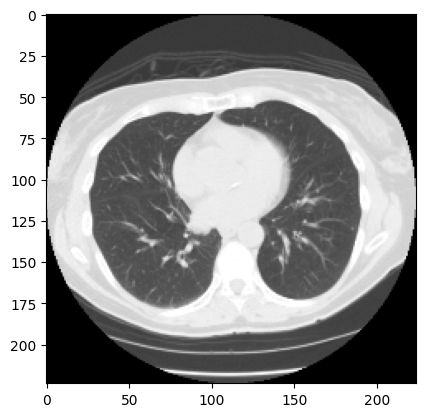

In [ ]:
img = np.asarray(images_nodule[0])
imgplot = plt.imshow(img)


# Model definition

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
def initialize_model():

    model = models.Sequential()
    model.add(layers.Conv2D(12, (4,4), activation="relu", input_shape=(224, 224, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(8, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(8, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(32, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    ### Model compilation
    model.compile(loss='binary_crossentropy',
       optimizer=opt,
       metrics=['accuracy'])
    return model


# Creating X and y for training and testing

In [ ]:
X = np.concatenate((images_parenchyma, images_normal), axis=0)
y = np.concatenate((labels_parenchyma,  labels_normal), axis=0)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
X_train.shape


(486, 224, 224, 3)

In [ ]:
y_train.shape


(486,)

# Training the model

In [ ]:
model = initialize_model()


In [ ]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

history = model.fit(X_train, y_train,
          epochs=100,
          batch_size=128,
          validation_split = 0.2,
          callbacks=[es],
          verbose=1)


Epoch 1/100
4/4 [==============================] - 2s 147ms/step - loss: 29.2846 - accuracy: 0.5361 - val_loss: 0.8286 - val_accuracy: 0.5612
Epoch 2/100
4/4 [==============================] - 0s 65ms/step - loss: 5.1998 - accuracy: 0.5335 - val_loss: 5.5353 - val_accuracy: 0.5510
Epoch 3/100
4/4 [==============================] - 0s 60ms/step - loss: 4.0166 - accuracy: 0.5258 - val_loss: 0.3692 - val_accuracy: 0.8571
Epoch 4/100
4/4 [==============================] - 0s 57ms/step - loss: 0.4274 - accuracy: 0.8660 - val_loss: 0.5794 - val_accuracy: 0.8163
Epoch 5/100
4/4 [==============================] - 0s 57ms/step - loss: 0.3742 - accuracy: 0.8866 - val_loss: 0.5645 - val_accuracy: 0.7653
Epoch 6/100
4/4 [==============================] - 0s 58ms/step - loss: 0.3466 - accuracy: 0.8582 - val_loss: 0.3531 - val_accuracy: 0.8673
Epoch 7/100
4/4 [==============================] - 0s 60ms/step - loss: 0.2536 - accuracy: 0.9175 - val_loss: 0.2758 - val_accuracy: 0.8776
Epoch 8/100
4/4 [=

# Testing the model and displaying results

In [ ]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)


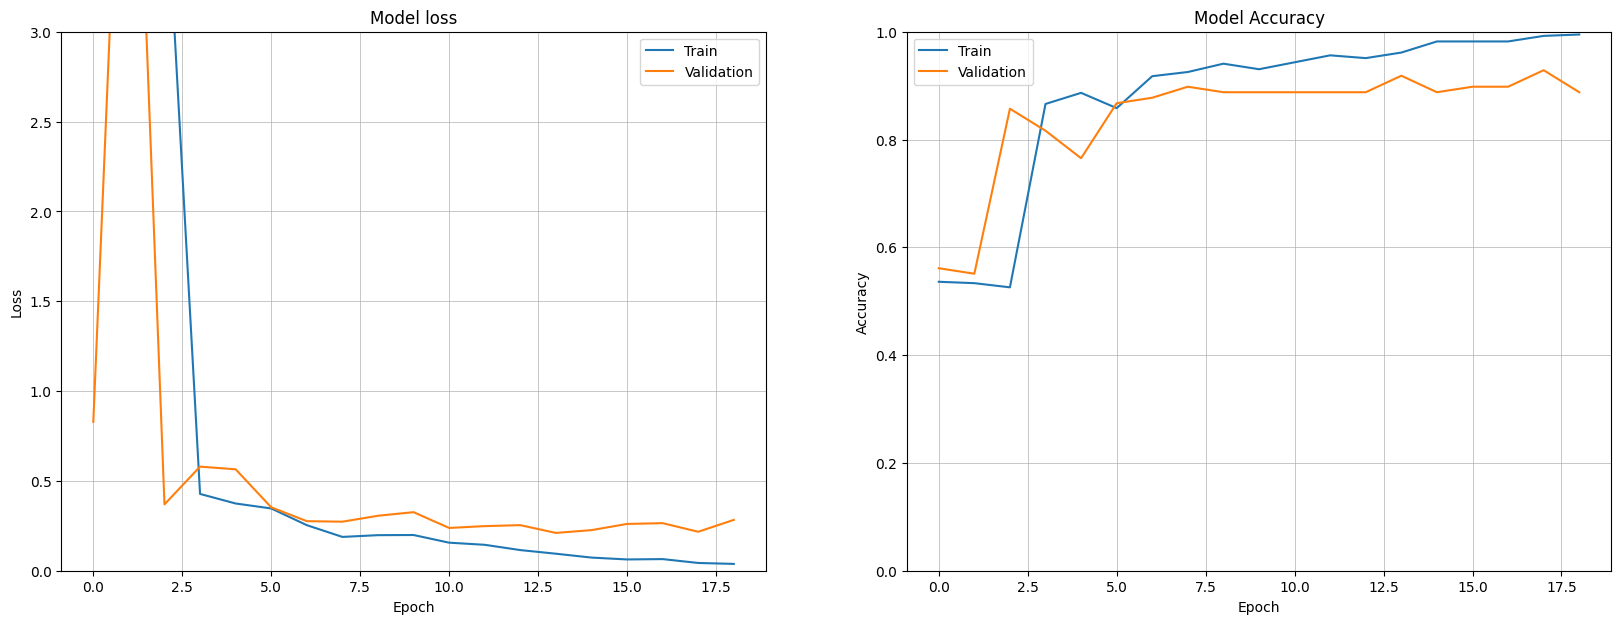

In [ ]:
plot_loss_accuracy(history, title=None)


In [ ]:
evaluation = model.evaluate(X_test, y_test)


4/4 [==============================] - 0s 10ms/step - loss: 0.1980 - accuracy: 0.9180


In [ ]:
accuracy = evaluation[1]
accuracy


0.9180327653884888

## Inter Model

In [ ]:
#images_nodule = [cv2.imread(file) for file in glob.glob(url_nodule + "*.png")]
labels_inter = [1] * len(images_inter)

#images_normal = [cv2.imread(file) for file in glob.glob(url_normal + "*.png")]
labels_normal = [0] * len(images_normal)


## Checking data

In [ ]:
normal_count = len(images_normal)
normal_count


320

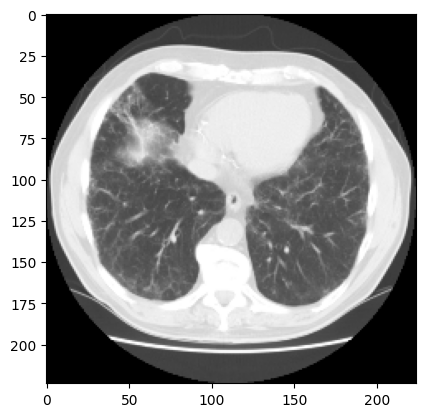

In [ ]:
img = np.asarray(images_inter[0])
imgplot = plt.imshow(img)


# Model definition

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
def initialize_model():

    model = models.Sequential()
    model.add(layers.Conv2D(12, (4,4), activation="relu", input_shape=(224, 224, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(8, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(8, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(32, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    ### Model compilation
    model.compile(loss='binary_crossentropy',
       optimizer=opt,
       metrics=['accuracy'])
    return model


# Creating X and y for training and testing

In [ ]:
X = np.concatenate((images_inter, images_normal), axis=0)
y = np.concatenate((labels_inter,  labels_normal), axis=0)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
X_train.shape


(486, 224, 224, 3)

In [ ]:
y_train.shape


(486,)

# Training the model

In [ ]:
model = initialize_model()


In [ ]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

history = model.fit(X_train, y_train,
          epochs=100,
          batch_size=128,
          validation_split = 0.2,
          callbacks=[es],
          verbose=1)


Epoch 1/100
4/4 [==============================] - 0s 94ms/step - loss: 0.2219 - accuracy: 0.9253 - val_loss: 0.0619 - val_accuracy: 0.9898
Epoch 2/100
4/4 [==============================] - 0s 58ms/step - loss: 0.1886 - accuracy: 0.9330 - val_loss: 0.1588 - val_accuracy: 0.9694
Epoch 3/100
4/4 [==============================] - 0s 58ms/step - loss: 0.2124 - accuracy: 0.9459 - val_loss: 0.0647 - val_accuracy: 0.9694
Epoch 4/100
4/4 [==============================] - 0s 56ms/step - loss: 0.1651 - accuracy: 0.9356 - val_loss: 0.1313 - val_accuracy: 0.9796
Epoch 5/100
4/4 [==============================] - 0s 60ms/step - loss: 0.1511 - accuracy: 0.9510 - val_loss: 0.0524 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 57ms/step - loss: 0.1297 - accuracy: 0.9536 - val_loss: 0.1410 - val_accuracy: 0.9490
Epoch 7/100
4/4 [==============================] - 0s 57ms/step - loss: 0.1277 - accuracy: 0.9562 - val_loss: 0.0389 - val_accuracy: 0.9796
Epoch 8/100
4/4 [===

# Testing the model and displaying results

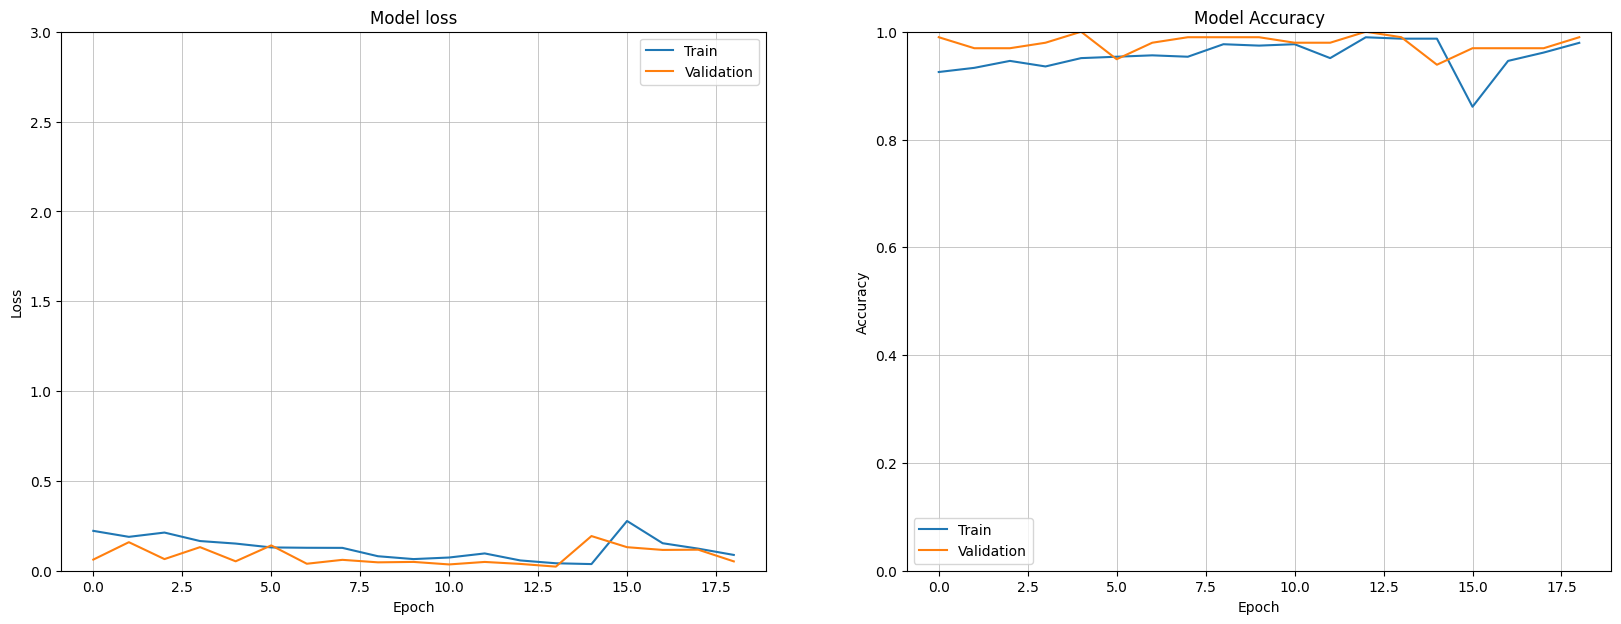

In [ ]:
plot_loss_accuracy(history, title=None)


In [ ]:
evaluation = model.evaluate(X_test, y_test)


4/4 [==============================] - 0s 9ms/step - loss: 0.2420 - accuracy: 0.9426


In [ ]:
accuracy = evaluation[1]
accuracy


0.9426229596138

## Bronch Model


In [ ]:
#images_nodule = [cv2.imread(file) for file in glob.glob(url_nodule + "*.png")]
labels_bronch = [1] * len(images_bronch)

#images_normal = [cv2.imread(file) for file in glob.glob(url_normal + "*.png")]
labels_normal = [0] * len(images_normal)


## Checking data

In [ ]:
normal_count = len(images_normal)
normal_count


320

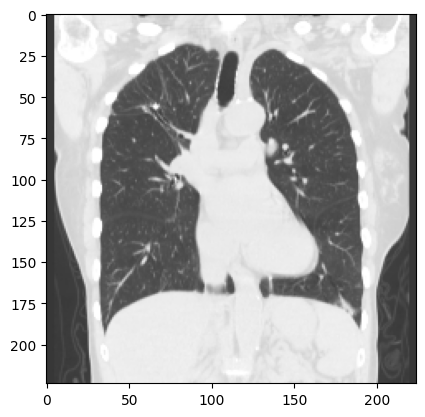

In [ ]:
img = np.asarray(images_bronch[0])
imgplot = plt.imshow(img)


# Model definition

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
def initialize_model():

    model = models.Sequential()
    model.add(layers.Conv2D(12, (4,4), activation="relu", input_shape=(224, 224, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(8, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(8, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(32, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    ### Model compilation
    model.compile(loss='binary_crossentropy',
       optimizer=opt,
       metrics=['accuracy'])
    return model


# Creating X and y for training and testing

In [ ]:
X = np.concatenate((images_bronch, images_normal), axis=0)
y = np.concatenate((labels_bronch,  labels_normal), axis=0)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
X_train.shape


(486, 224, 224, 3)

In [ ]:
y_train.shape


(486,)

# Training the model

In [ ]:
model = initialize_model()


In [ ]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

history = model.fit(X_train, y_train,
          epochs=100,
          batch_size=128,
          validation_split = 0.2,
          callbacks=[es],
          verbose=1)


Epoch 1/100
4/4 [==============================] - 2s 160ms/step - loss: 12.9277 - accuracy: 0.4948 - val_loss: 7.0596 - val_accuracy: 0.4694
Epoch 2/100
4/4 [==============================] - 0s 75ms/step - loss: 4.5198 - accuracy: 0.5180 - val_loss: 2.1407 - val_accuracy: 0.5306
Epoch 3/100
4/4 [==============================] - 0s 61ms/step - loss: 1.6137 - accuracy: 0.5541 - val_loss: 1.0644 - val_accuracy: 0.5408
Epoch 4/100
4/4 [==============================] - 0s 61ms/step - loss: 1.0903 - accuracy: 0.5515 - val_loss: 0.4576 - val_accuracy: 0.7959
Epoch 5/100
4/4 [==============================] - 0s 58ms/step - loss: 0.4251 - accuracy: 0.8119 - val_loss: 0.6139 - val_accuracy: 0.7347
Epoch 6/100
4/4 [==============================] - 0s 62ms/step - loss: 0.4639 - accuracy: 0.7809 - val_loss: 0.3404 - val_accuracy: 0.8163
Epoch 7/100
4/4 [==============================] - 0s 56ms/step - loss: 0.3179 - accuracy: 0.8634 - val_loss: 0.3737 - val_accuracy: 0.8061
Epoch 8/100
4/4 [=

# Testing the model and displaying results

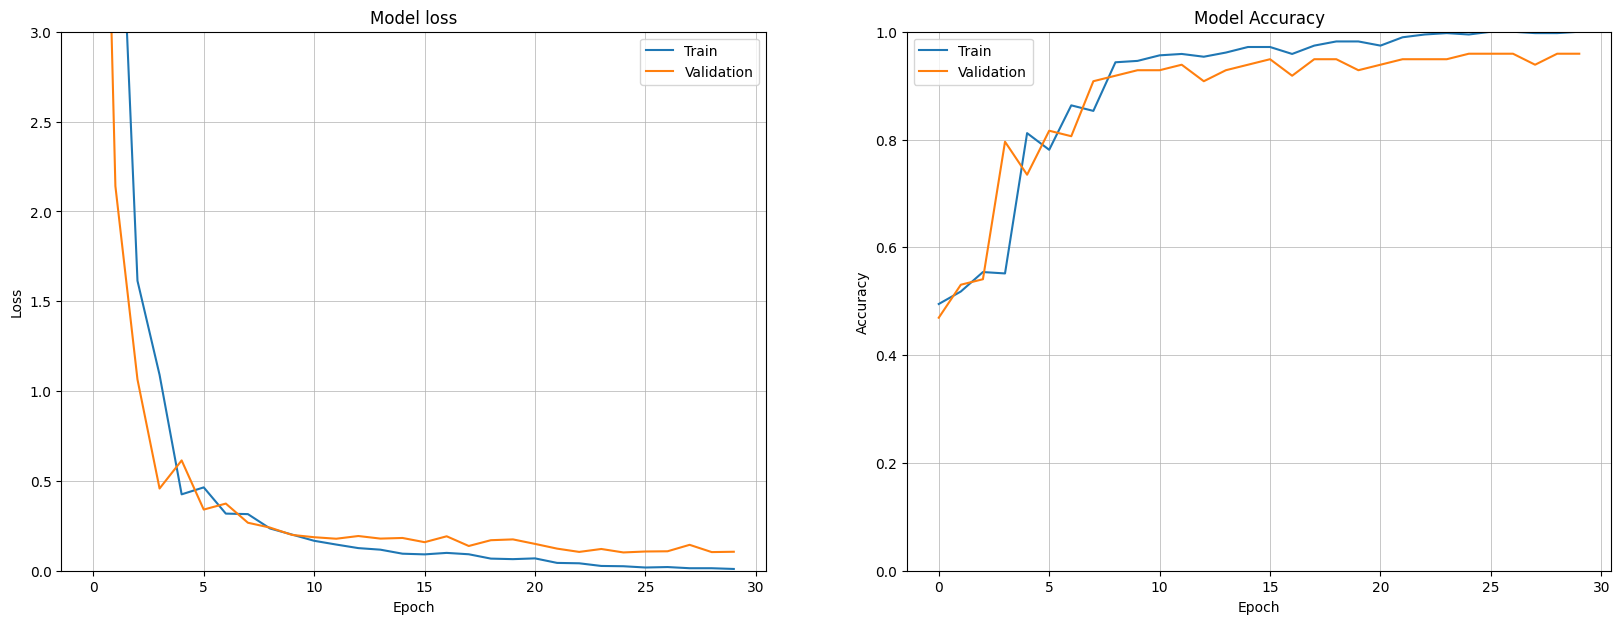

In [ ]:
plot_loss_accuracy(history, title=None)


In [ ]:
evaluation = model.evaluate(X_test, y_test)


4/4 [==============================] - 0s 9ms/step - loss: 0.1153 - accuracy: 0.9508


In [ ]:
accuracy = evaluation[1]
accuracy


0.9508196711540222

In [ ]:
labels_airspace = [2] * len(images_nodule)

labels_nodule = [4] * len(images_nodule)


## Nodule Model

In [ ]:
labels_nodule= [1] * len(images_nodule)


In [ ]:
#images_nodule = [cv2.imread(file) for file in glob.glob(url_nodule + "*.png")]
labels_nodule = [1] * len(images_nodule)

#images_normal = [cv2.imread(file) for file in glob.glob(url_normal + "*.png")]
labels_normal = [0] * len(images_normal)


## Checking data

In [ ]:
normal_count = len(images_normal)
normal_count


320

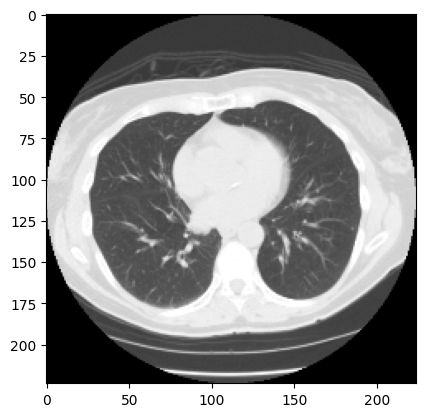

In [ ]:
img = np.asarray(images_nodule[0])
imgplot = plt.imshow(img)


# Model definition

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
def initialize_model():

    model = models.Sequential()
    model.add(layers.Conv2D(12, (4,4), activation="relu", input_shape=(224, 224, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(8, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(8, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(32, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    ### Model compilation
    model.compile(loss='binary_crossentropy',
       optimizer=opt,
       metrics=['accuracy'])
    return model


# Creating X and y for training and testing

In [ ]:
X = np.concatenate((images_nodule, images_normal), axis=0)
y = np.concatenate((labels_nodule,  labels_normal), axis=0)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
X_train.shape


(486, 224, 224, 3)

In [ ]:
y_train.shape


(486,)

# Training the model

In [ ]:
model = initialize_model()


In [ ]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

history = model.fit(X_train, y_train,
          epochs=100,
          batch_size=128,
          validation_split = 0.2,
          callbacks=[es],
          verbose=1)


Epoch 1/100
4/4 [==============================] - 2s 143ms/step - loss: 65.5788 - accuracy: 0.4691 - val_loss: 6.7737 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 70ms/step - loss: 15.0482 - accuracy: 0.5103 - val_loss: 13.5418 - val_accuracy: 0.4388
Epoch 3/100
4/4 [==============================] - 0s 67ms/step - loss: 7.5157 - accuracy: 0.4897 - val_loss: 1.5033 - val_accuracy: 0.5714
Epoch 4/100
4/4 [==============================] - 0s 67ms/step - loss: 1.7246 - accuracy: 0.5567 - val_loss: 0.6905 - val_accuracy: 0.6327
Epoch 5/100
4/4 [==============================] - 0s 68ms/step - loss: 0.6576 - accuracy: 0.7062 - val_loss: 0.4686 - val_accuracy: 0.7755
Epoch 6/100
4/4 [==============================] - 0s 71ms/step - loss: 0.3773 - accuracy: 0.8273 - val_loss: 0.3664 - val_accuracy: 0.8061
Epoch 7/100
4/4 [==============================] - 0s 65ms/step - loss: 0.2862 - accuracy: 0.8866 - val_loss: 0.4864 - val_accuracy: 0.8061
Epoch 8/100
4/4 

# Testing the model and displaying results

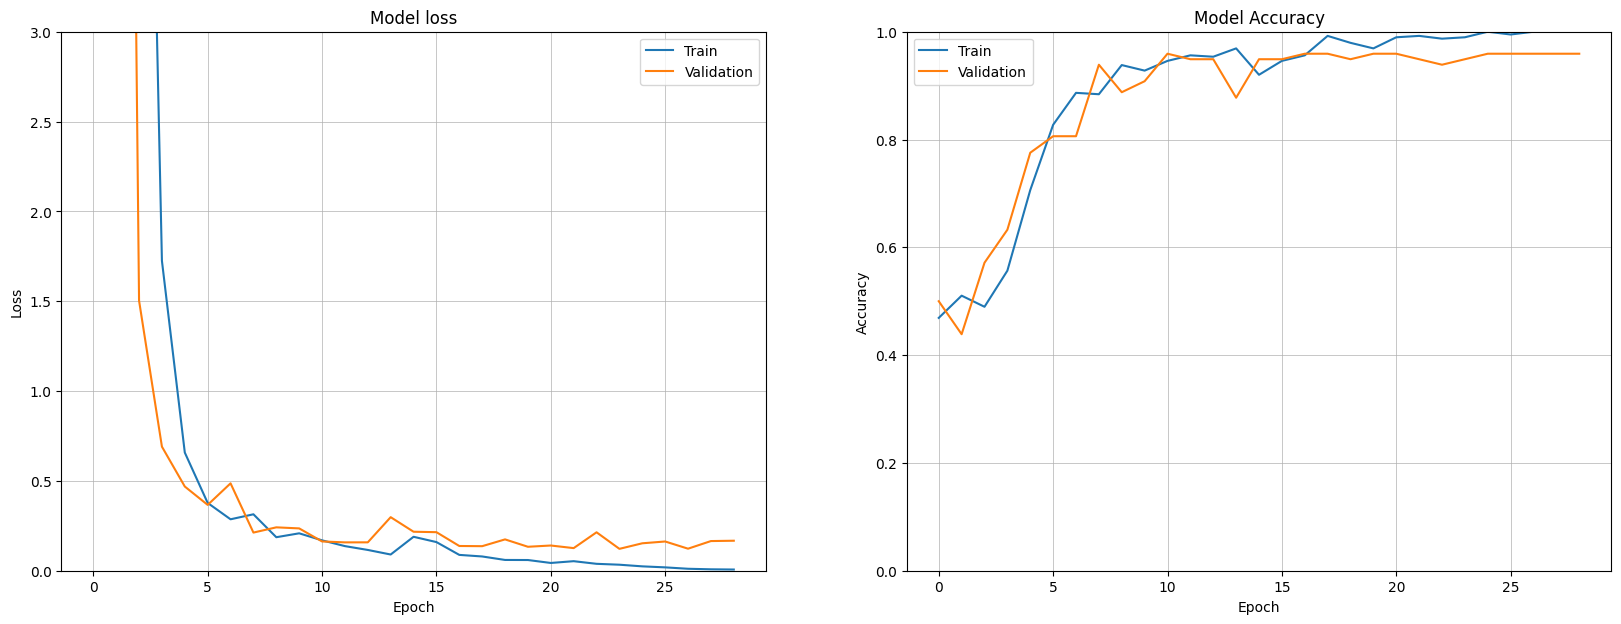

In [ ]:
plot_loss_accuracy(history, title=None)


In [ ]:
evaluation = model.evaluate(X_test, y_test)


4/4 [==============================] - 0s 13ms/step - loss: 0.2220 - accuracy: 0.9098


In [ ]:
accuracy = evaluation[1]
accuracy


0.9098360538482666